In [1]:
import tensorflow as tf

## loading the dataset with training samples = 60000 and testing set = 10000

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from 'C:\\Users\\gs935\\anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## dividing the dataset into train and test

In [4]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt


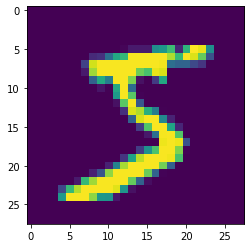

In [7]:
plt.imshow(X_train[0])

## Normalization

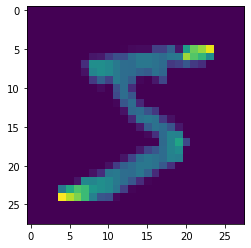

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0])

In [9]:

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


## resizing the image

In [11]:
import numpy as np
img_size=28
X_train = np.array(X_train).reshape(-1, img_size, img_size, 1)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)


## creating deep learning netowrk

## Convutional Layer

In [12]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2)) ## maxpooling

## second layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2)) ## maxpooling

## third layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2)) ## maxpooling

## flattening

In [15]:
cnn.add(tf.keras.layers.Flatten())

## dense layers or fully connected layers

In [16]:
cnn.add(tf.keras.layers.Dense(units = 64, activation="relu"))

In [17]:
cnn.add(tf.keras.layers.Dense(units=32, activation="relu"))

## output layer

In [18]:
cnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [20]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
cnn.fit(X_train, y_train, epochs=5, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.3367 - accuracy: 0.8956 - val_loss: 0.1374 - val_accuracy: 0.9586
Epoch 2/5
42000/42000 [==============================] - 43s 1ms/sample - loss: 0.1106 - accuracy: 0.9657 - val_loss: 0.0900 - val_accuracy: 0.9735
Epoch 3/5
42000/42000 [==============================] - 42s 989us/sample - loss: 0.0789 - accuracy: 0.9763 - val_loss: 0.0816 - val_accuracy: 0.9749
Epoch 4/5
42000/42000 [==============================] - 41s 981us/sample - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0635 - val_accuracy: 0.9808
Epoch 5/5
42000/42000 [==============================] - 44s 1ms/sample - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.0766 - val_accuracy: 0.9779


In [22]:
y_pred = cnn.predict(X_test)

In [23]:
cnn.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07032517583840527, 0.9795]

In [24]:
print(y_pred.shape)

(10000, 10)


In [25]:
np.argmax(y_pred[0])

7

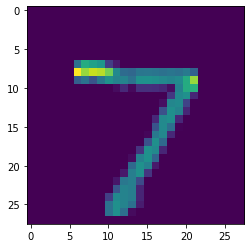

In [26]:
plt.imshow(X_test[0].reshape((28,28)))

In [27]:
!pip install opencv-python


In [28]:
import cv2 as cv

In [29]:
img = cv.imread("img.png",1)

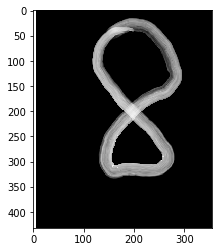

In [30]:
plt.imshow(img)

In [31]:
img.shape

(432, 356, 3)

In [32]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [33]:
gray.shape

(432, 356)

In [34]:
resized = cv.resize(gray, (28,28), interpolation=cv.INTER_AREA)

In [35]:
resized.shape

(28, 28)

In [36]:
resized = tf.keras.utils.normalize(resized, axis=1)

In [37]:
resized = np.array(resized).reshape(-1, 28,28,1)

In [38]:
resized.shape

(1, 28, 28, 1)

In [47]:
pred = cnn.predict(resized)
print(pred)

[[1.9471824e-07 1.1575136e-05 3.7262600e-06 6.9578462e-08 3.3861443e-07
  4.4001413e-07 1.4104199e-06 5.5317653e-09 9.9998224e-01 8.7589869e-10]]


In [40]:
print(np.argmax(pred))

8


In [54]:

cnn.save("predictor.tf")

INFO:tensorflow:Assets written to: predictor.tf\assets
